In [1]:
import gym
import numpy as np
import inventory_model
import pandas as pd
from evaluate import *
from ppo_evaluate import ppo_evaluate
import matplotlib as plt


from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#wrapper for cont env with PPO, plot result for several steps
def ppo_eval_interval(p, L, t_t, n_iter, n_step, gae, learning_rate=0.0003):
    ContCONFIG = {'h': 1, 'p': p, 'L': L, 'lambda': 1}
    cont_env = make_vec_env('inventory_cont_config_fix_model-v0', n_envs=4, env_kwargs=ContCONFIG)
    print("Running PPO w/: p=", p, ", L=",L)
    cont_model = PPO(MlpPolicy, cont_env, verbose=1, gamma = 1, gae_lambda = gae,
                     learning_rate = learning_rate,use_sde = False, n_steps = n_step)
    env_eval = make_vec_env('inventory_cont_config_fix_model-v0', n_envs=1, env_kwargs=ContCONFIG)
    timesteps = 0
    numiter = n_iter#test
    res_mean_arr = []
    res_std_arr = []

    while(timesteps <= t_t):

        cont_model.learn(total_timesteps=2*4*n_step-1)#each iteration has 8192 timesteps with n_env=4
        timesteps = timesteps + 2*4*n_step

        res_mean, res_std = ppo_evaluate(cont_model, env_eval, numiter)
        res_mean_arr.append(-res_mean)
        res_std_arr.append(res_std)
        print(res_mean_arr)
    
#     plt.pyplot.plot(res_mean_arr)

    return res_mean_arr, res_std_arr

In [4]:
# listp = [0.25,1,4,9,39,99]
# listL = [30,50,70,100]
listp = [99]
listL = [100]
n_iter = 10000
gae_lambda = 0.99
# n_step = 8192
learning_rate = 0.0003

ppo_res = pd.DataFrame(columns = ['p','L','res_mean', 'res_std'])

for p in listp:
    for L in listL:
        n_step = 64*L 
        t_t = 100*4*n_step
        res_mean, res_std = ppo_eval_interval(p,L,t_t, n_iter, n_step, gae_lambda, learning_rate)
        ppo_res = ppo_res.append({'p': p, 'L':L, 'res_mean':min(res_mean), 'res_std': res_std[np.argmin(res_mean)]}, ignore_index=True)

Running PPO w/: p= 99 , L= 100
Using cpu device
------------------------------
| time/              |       |
|    fps             | 5020  |
|    iterations      | 1     |
|    time_elapsed    | 5     |
|    total_timesteps | 25600 |
------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2122        |
|    iterations           | 2           |
|    time_elapsed         | 24          |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.002657224 |
|    clip_fraction        | 0.00666     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 4.25e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 1.61e+07    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00115    |
|    std                  | 0.996       |
|    value_loss      

------------------------------------------
| time/                   |              |
|    fps                  | 1579         |
|    iterations           | 2            |
|    time_elapsed         | 32           |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0009628569 |
|    clip_fraction        | 0.00139      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.39        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 2.14e+06     |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.000514    |
|    std                  | 0.973        |
|    value_loss           | 3.67e+06     |
------------------------------------------
mean:  -18.489506365890627
standard deviation: 1.4706861953713593
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627

mean:  -18.766073490441855
standard deviation: 0.5083803697393635
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627, 18.052022371433413, 18.441970998636666, 17.849824136407072, 18.766073490441855]
------------------------------------------
| time/                   |              |
|    fps                  | 4250         |
|    iterations           | 1            |
|    time_elapsed         | 6            |
|    total_timesteps      | 25600        |
| train/                  |              |
|    approx_kl            | 0.0017847917 |
|    clip_fraction        | 0.00804      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.35        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 1.54e+06     |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00118     |
|    std                  | 0.93         |
|   

------------------------------------------
| time/                   |              |
|    fps                  | 1815         |
|    iterations           | 2            |
|    time_elapsed         | 28           |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0017732825 |
|    clip_fraction        | 0.00724      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.27        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 2.1e+06      |
|    n_updates            | 290          |
|    policy_gradient_loss | -0.0012      |
|    std                  | 0.863        |
|    value_loss           | 4.02e+06     |
------------------------------------------
mean:  -17.587777179924025
standard deviation: 0.6693536376605714
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627

mean:  -17.456450386220617
standard deviation: 0.694662391418355
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627, 18.052022371433413, 18.441970998636666, 17.849824136407072, 18.766073490441855, 17.521946988716614, 17.98562484225272, 18.649537145128637, 17.81919962193791, 17.587777179924025, 17.496702026748363, 16.38772019196383, 16.538212302159717, 17.456450386220617]
----------------------------------------
| time/                   |            |
|    fps                  | 4165       |
|    iterations           | 1          |
|    time_elapsed         | 6          |
|    total_timesteps      | 25600      |
| train/                  |            |
|    approx_kl            | 0.00255541 |
|    clip_fraction        | 0.00779    |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.21      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0003     |
|    loss                 

mean:  -17.789183173764116
standard deviation: 0.6776339965712554
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627, 18.052022371433413, 18.441970998636666, 17.849824136407072, 18.766073490441855, 17.521946988716614, 17.98562484225272, 18.649537145128637, 17.81919962193791, 17.587777179924025, 17.496702026748363, 16.38772019196383, 16.538212302159717, 17.456450386220617, 16.821507348637976, 17.16460723377583, 18.330946300310394, 17.789183173764116]
------------------------------------------
| time/                   |              |
|    fps                  | 4511         |
|    iterations           | 1            |
|    time_elapsed         | 5            |
|    total_timesteps      | 25600        |
| train/                  |              |
|    approx_kl            | 0.0022611944 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.17        |
|    e

mean:  -17.854626534385034
standard deviation: 1.1093238000097132
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627, 18.052022371433413, 18.441970998636666, 17.849824136407072, 18.766073490441855, 17.521946988716614, 17.98562484225272, 18.649537145128637, 17.81919962193791, 17.587777179924025, 17.496702026748363, 16.38772019196383, 16.538212302159717, 17.456450386220617, 16.821507348637976, 17.16460723377583, 18.330946300310394, 17.789183173764116, 15.964616665431109, 16.04222977255433, 16.724780189192558, 17.854626534385034]
------------------------------------------
| time/                   |              |
|    fps                  | 3850         |
|    iterations           | 1            |
|    time_elapsed         | 6            |
|    total_timesteps      | 25600        |
| train/                  |              |
|    approx_kl            | 0.0036461577 |
|    clip_fraction        | 0.0149       |
|    clip_ran

------------------------------------------
| time/                   |              |
|    fps                  | 2057         |
|    iterations           | 2            |
|    time_elapsed         | 24           |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0025601527 |
|    clip_fraction        | 0.0202       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.13        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 1.2e+06      |
|    n_updates            | 610          |
|    policy_gradient_loss | -0.00326     |
|    std                  | 0.749        |
|    value_loss           | 3.24e+06     |
------------------------------------------
mean:  -16.98782215452074
standard deviation: 0.7716687383919336
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627,

------------------------------------------
| time/                   |              |
|    fps                  | 4874         |
|    iterations           | 1            |
|    time_elapsed         | 5            |
|    total_timesteps      | 25600        |
| train/                  |              |
|    approx_kl            | 0.0029024286 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.08        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 1.63e+06     |
|    n_updates            | 680          |
|    policy_gradient_loss | -0.00291     |
|    std                  | 0.711        |
|    value_loss           | 2.95e+06     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2232         |
|    iterations           | 2            |
|    time_e

mean:  -16.047880906281144
standard deviation: 0.27009976370287203
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627, 18.052022371433413, 18.441970998636666, 17.849824136407072, 18.766073490441855, 17.521946988716614, 17.98562484225272, 18.649537145128637, 17.81919962193791, 17.587777179924025, 17.496702026748363, 16.38772019196383, 16.538212302159717, 17.456450386220617, 16.821507348637976, 17.16460723377583, 18.330946300310394, 17.789183173764116, 15.964616665431109, 16.04222977255433, 16.724780189192558, 17.854626534385034, 16.546672892091685, 16.220860536658726, 16.622491869114956, 16.98782215452074, 17.27830613282898, 16.725847413404637, 16.56340963183917, 16.75703291388471, 15.970329081485255, 16.16508458158983, 16.047880906281144]
------------------------------------------
| time/                   |              |
|    fps                  | 4884         |
|    iterations           | 1            |
|    time_el

------------------------------------------
| time/                   |              |
|    fps                  | 4588         |
|    iterations           | 1            |
|    time_elapsed         | 5            |
|    total_timesteps      | 25600        |
| train/                  |              |
|    approx_kl            | 0.0033384888 |
|    clip_fraction        | 0.0222       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.06        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 8.79e+05     |
|    n_updates            | 820          |
|    policy_gradient_loss | -0.00363     |
|    std                  | 0.696        |
|    value_loss           | 2.25e+06     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 2086         |
|    iterations           | 2            |
|    time_e

------------------------------------------
| time/                   |              |
|    fps                  | 2178         |
|    iterations           | 2            |
|    time_elapsed         | 23           |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0021618104 |
|    clip_fraction        | 0.0216       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.02        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.68e+06     |
|    n_updates            | 890          |
|    policy_gradient_loss | -0.00332     |
|    std                  | 0.67         |
|    value_loss           | 2.91e+06     |
------------------------------------------
mean:  -15.59819821619389
standard deviation: 0.24734903545513617
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627

mean:  -16.036464770979926
standard deviation: 0.6707744903685497
[52.335113967676705, 42.16078371218888, 31.523352460156183, 21.811021889981973, 17.89220308685111, 18.489506365890627, 18.052022371433413, 18.441970998636666, 17.849824136407072, 18.766073490441855, 17.521946988716614, 17.98562484225272, 18.649537145128637, 17.81919962193791, 17.587777179924025, 17.496702026748363, 16.38772019196383, 16.538212302159717, 17.456450386220617, 16.821507348637976, 17.16460723377583, 18.330946300310394, 17.789183173764116, 15.964616665431109, 16.04222977255433, 16.724780189192558, 17.854626534385034, 16.546672892091685, 16.220860536658726, 16.622491869114956, 16.98782215452074, 17.27830613282898, 16.725847413404637, 16.56340963183917, 16.75703291388471, 15.970329081485255, 16.16508458158983, 16.047880906281144, 16.091533248693448, 16.622822233782053, 16.145109367121684, 15.486464970653156, 16.09371413153515, 15.529330335543303, 15.59819821619389, 16.17685391036025, 16.033492831824425, 16.03646

In [5]:
ppo_res

,p,L,res_mean,res_std
0,99.0,100.0,15.486465,0.809796


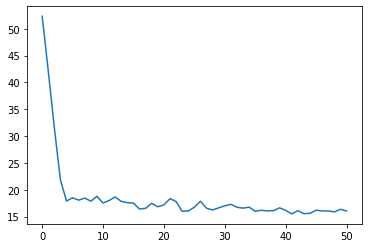

In [6]:
plt.pyplot.plot(res_mean)

## Below is obsolete.

In [7]:
#wrapper for continuous environment, obsolete
def ppo_eval(p, L, t_t, n_iter, learning_rate=0.0003):
    ContCONFIG = {'h': 1, 'p': p, 'L': L, 'lambda': 1}
    cont_env = make_vec_env('inventory_cont_config_fix_model-v0', n_envs=4, env_kwargs=ContCONFIG)
    print("Running PPO w/: p=", p, ", L=",L)
    cont_model = PPO(MlpPolicy, cont_env, verbose=1, gamma = 1, learning_rate = learning_rate,use_sde = False)
    cont_model.learn(total_timesteps=t_t)#testing 2000

    cont_model.save("inv_cont_2")
    trained_model = PPO.load("inv_cont_2")
    env_eval = make_vec_env('inventory_cont_config_fix_model-v0', n_envs=1, env_kwargs=ContCONFIG)
    numiter = n_iter#test
    res_mean, res_std = ppo_evaluate(trained_model, env_eval, numiter)
    print(-res_mean,'+/=',1.96*res_std/np.sqrt(5)) 

    return res_mean, res_std

In [8]:
# listp = [0.25,1,4,9,39,99]
# listL = [1,4,10,20,30,50,70,100]
listp = [39]
listL = [1]
t_t = 200000
n_iter = 100000
learning_rate = 0.005
ppo_res = pd.DataFrame(columns = ['p','L','res_mean', 'res_std'])

for p in listp:
    for L in listL:
        res_mean, res_std = ppo_eval(p,L,t_t, n_iter, learning_rate)
        ppo_res = ppo_res.append({'p': p, 'L':L, 'res_mean':res_mean, 'res_std': res_std}, ignore_index=True)

Running PPO w/: p= 39 , L= 1
Using cpu device
------------------------------------------
| time/                   |              |
|    fps                  | 5888         |
|    iterations           | 1            |
|    time_elapsed         | 1            |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0029337332 |
|    clip_fraction        | 0.0318       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.01        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 9.27e+05     |
|    n_updates            | 1020         |
|    policy_gradient_loss | -0.00431     |
|    std                  | 0.661        |
|    value_loss           | 2.05e+06     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2471        |
|    iterat

-------------------------------------------
| time/                   |               |
|    fps                  | 1734          |
|    iterations           | 11            |
|    time_elapsed         | 51            |
|    total_timesteps      | 90112         |
| train/                  |               |
|    approx_kl            | -2.055095e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.45         |
|    explained_variance   | -1.19e-07     |
|    learning_rate        | 0.005         |
|    loss                 | 2.99e+10      |
|    n_updates            | 100           |
|    policy_gradient_loss | 4.61e-06      |
|    std                  | 1.03          |
|    value_loss           | 6.03e+10      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1705         |
|    iterations           | 12     

------------------------------------------
| time/                   |              |
|    fps                  | 1669         |
|    iterations           | 21           |
|    time_elapsed         | 103          |
|    total_timesteps      | 172032       |
| train/                  |              |
|    approx_kl            | 0.0018218441 |
|    clip_fraction        | 3.66e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.46        |
|    explained_variance   | 1.19e-07     |
|    learning_rate        | 0.005        |
|    loss                 | 2.07e+11     |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.000586    |
|    std                  | 1.04         |
|    value_loss           | 4.13e+11     |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1670          |
|    iterations           | 22            |
|    ti

In [9]:
ppo_res

,p,L,res_mean,res_std
0,39.0,1.0,-52550.607351,198.009654


In [10]:
#continuous model try with cont action

# #env = make_vec_env('inventory_cont_model-v0', ContCONFIG = {'h': 1, 'p': 1, 'L': 10, 'lambda': 1}, n_envs=4)
# #how to set parameters???
# cont_env = make_vec_env('inventory_cont_model-v0', n_envs=8)
# cont_model = PPO(MlpPolicy, cont_env, verbose=1, gamma = 1)
# cont_model.learn(total_timesteps=200000)
# # fixed issue with vector, now action can be continuous

# #continuous evaluation
# cont_model.save("inv_cont_1")
# trained_model = PPO.load("inv_cont_1")
# env1 = gym.make('inventory_cont_model-v0')
# numiter = 50000
# res_mean, res_std = ppo_evaluate(trained_model, env1, numiter)
# print(-res_mean,'+/=',1.96*res_std/np.sqrt(5)) 

In [11]:
#Discrete environment
# #h=1,p=99,L=1,max_inventory=100,max_action=100,binomial(6,0.5)
# env = make_vec_env('inventory_model-v0', n_envs=4)
# model = PPO(MlpPolicy, env, verbose=1, gamma = 1)
# model.learn(total_timesteps=1000000)
# model.save("inv_2")

# trained_model2 = PPO.load("inv_2")
# env2 = gym.make('inventory_model-v0')
# numiter = 200000
# res_mean, res_std = ppo_evaluate(trained_model2, env2, numiter)
# print(-res_mean,'+/=',1.96*res_std/np.sqrt(5)) 

In [12]:
#Discrete environment 2
#h=1,p=99,L=1,max_inventory=100,max_action=6,binomial(6,0.5)
# env = make_vec_env('inventory_model-v0', n_envs=4)
# model = PPO(MlpPolicy, env, verbose=1, gamma = 1)
# model.learn(total_timesteps=1000000)
# model.save("inv_3")

# #set action space to be small([0,1,2,3,4,5,6]) seems to get reasonable results...
# trained_model3 = PPO.load("inv_3")
# env3 = gym.make('inventory_model-v0')
# numiter = 200000
# res_mean, res_std = ppo_evaluate(trained_model3, env3, numiter)
# print(-res_mean,'+/=',1.96*res_std/np.sqrt(5)) 